
# __Explorative Data Analysis (EDA) of GlowNest's Financials__
### Vedant Vivek Nichal<br>(2024A7PS0174H)

## Table of Contents
- Basic Steps:
    - Importing Libraries
    - Loading Dataset
    - Looking for Key Details
    - Checking for Missing Values
    - Checking for Outliners
- Data Analysis:
    - Checking GlowNest's Profit over time
    - Comparing GlowNest's profit with its competitor in the same time frame
    - Marketing ROI Analysis
    - Discount Spiral Analysis
    - Quality Crisis Analysis
    - Digital Channel Welness
    - Universal Product Decline Analysis
    - Regional Problems Analysis
    - Industry and Customer Trend Analysis
    - Final Insights & Strategy Recommendations
- Conclusion

## __Basic Steps__

In [41]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # hide warnings

In [42]:
#Loading the dataset
df = pd.read_csv("glownest_sales.csv")

In [43]:
#Seeing the first few rows
df.head()

,Month,Product_Category,Sales_Volume,Revenue_INR,Marketing_Spend_INR,Discount_Percentage,Return_Rate_Percentage,Customer_Satisfaction_Score,Inventory_Turnover_Days,Customer_Age_Group,Region,Online_Sales_Percentage,Profit_INR,Competitor_Profit_INR
0,Jan-2024,Face_Serum,5800,2900000,350000,7,3,88,28,18-22,North,75,450000,585000
1,Jan-2024,Face_Serum,5500,2750000,330000,6,4,85,30,18-22,West,72,420000,546000
2,Jan-2024,Face_Serum,5200,2600000,310000,8,5,82,33,23-27,South,65,380000,532000
3,Jan-2024,Face_Serum,5000,2500000,290000,7,4,84,31,18-22,East,70,390000,507000
4,Jan-2024,Face_Serum,4700,2350000,270000,6,3,86,29,23-27,Northeast,68,360000,468000


In [44]:
#Checking the shape of the data (rows, columns)
df.shape

(300, 14)

In [45]:
#Checking the columns of the table
df.columns

Index(['Month', 'Product_Category', 'Sales_Volume', 'Revenue_INR',
       'Marketing_Spend_INR', 'Discount_Percentage', 'Return_Rate_Percentage',
       'Customer_Satisfaction_Score', 'Inventory_Turnover_Days',
       'Customer_Age_Group', 'Region', 'Online_Sales_Percentage', 'Profit_INR',
       'Competitor_Profit_INR'],
      dtype='object')

In [46]:
# Viewing columns and datatype of information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Month                        300 non-null    object
 1   Product_Category             300 non-null    object
 2   Sales_Volume                 300 non-null    int64 
 3   Revenue_INR                  300 non-null    int64 
 4   Marketing_Spend_INR          300 non-null    int64 
 5   Discount_Percentage          300 non-null    int64 
 6   Return_Rate_Percentage       300 non-null    int64 
 7   Customer_Satisfaction_Score  300 non-null    int64 
 8   Inventory_Turnover_Days      300 non-null    int64 
 9   Customer_Age_Group           300 non-null    object
 10  Region                       300 non-null    object
 11  Online_Sales_Percentage      300 non-null    int64 
 12  Profit_INR                   300 non-null    int64 
 13  Competitor_Profit_INR        300 no

In [47]:
#Product catoegories
categories = df.Product_Category.unique()
categories

array(['Face_Serum', 'Shampoo', 'Body_Wash', 'Lip_Balm', 'Face_Mask'],
      dtype=object)

- These are the 5 product categories we are dealing with

In [48]:
#Regions
regions = df.Region.unique()
regions

array(['North', 'West', 'South', 'East', 'Northeast'], dtype=object)

- We are studying about the sales in these 5 regions

In [49]:
#Month
regions = df.Month.unique()
regions

array(['Jan-2024', 'Feb-2024', 'Mar-2024', 'Apr-2024', 'May-2024',
       'Jun-2024', 'Jul-2024', 'Aug-2024', 'Sep-2024', 'Oct-2024',
       'Nov-2024', 'Dec-2024'], dtype=object)

- We are looking at sales from Jan-24 to Dec-24 in our study

So basically we have the sales data of 5 prodct categories in 5 different regions during the time period of Jan-24 to Dec-24

In [50]:
#Customer age groups

regions = df.Customer_Age_Group.unique()
regions

array(['18-22', '23-27'], dtype=object)

- We have 2 age groups among our customers : 18-22yrs and 23-27yrs

In [51]:
#Describe
df.describe()

,Sales_Volume,Revenue_INR,Marketing_Spend_INR,Discount_Percentage,Return_Rate_Percentage,Customer_Satisfaction_Score,Inventory_Turnover_Days,Online_Sales_Percentage,Profit_INR,Competitor_Profit_INR
count,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2931.333333,1.108767e+06,343133.333333,12.780000,9.700000,78.220000,30.740000,62.663333,145266.666667,202156.666667
std,1219.854516,7.596841e+05,113134.936847,3.868871,3.682645,4.786925,5.466138,6.250885,107911.593115,144965.664677
min,1000.000000,2.000000e+05,140000.000000,4.000000,2.000000,66.000000,18.000000,47.000000,-10000.000000,-15000.000000
25%,1900.000000,5.100000e+05,257500.000000,10.000000,7.000000,75.000000,27.000000,58.000000,65000.000000,84500.000000
50%,2600.000000,7.800000e+05,330000.000000,13.000000,10.000000,78.000000,31.000000,63.000000,95000.000000,135000.000000
75%,3900.000000,1.570000e+06,420000.000000,16.000000,13.000000,82.000000,35.000000,67.000000,212500.000000,316250.000000
max,6200.000000,3.100000e+06,650000.000000,22.000000,18.000000,90.000000,44.000000,78.000000,450000.000000,585000.000000


This is displaying certain statistics about the numericals columns of our dataset

- We can see that the mean profit of the Competitor is higher than that of GlowNest.

In [52]:
# Finding missing values
df.isnull().sum()

Month                          0
Product_Category               0
Sales_Volume                   0
Revenue_INR                    0
Marketing_Spend_INR            0
Discount_Percentage            0
Return_Rate_Percentage         0
Customer_Satisfaction_Score    0
Inventory_Turnover_Days        0
Customer_Age_Group             0
Region                         0
Online_Sales_Percentage        0
Profit_INR                     0
Competitor_Profit_INR          0
dtype: int64

- So, we do not have any missing values!

<Axes: >

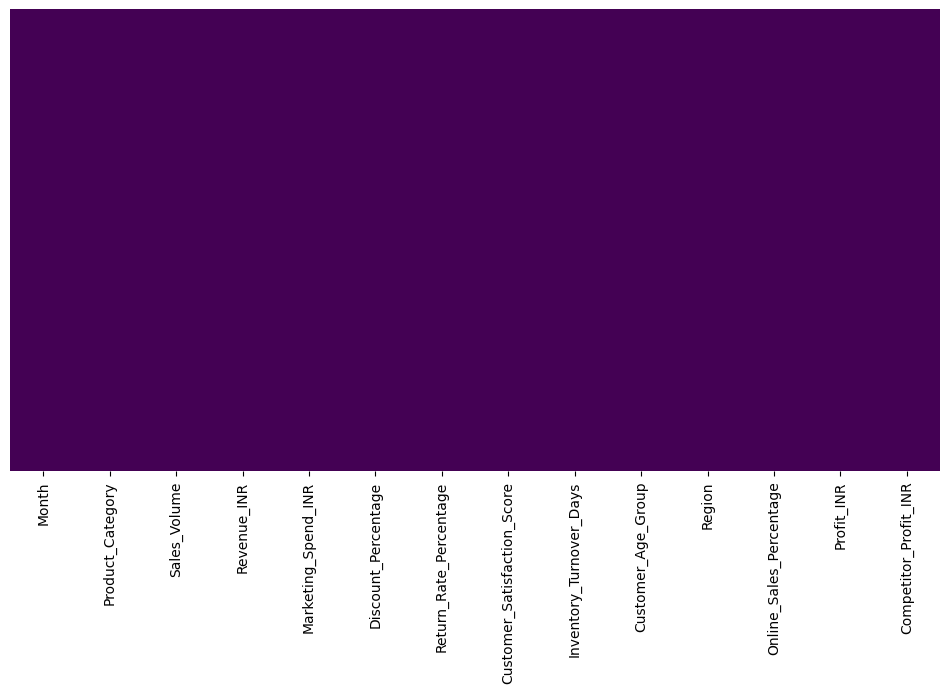

In [53]:
#Heatmap to display missing values (if any)
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

- No Missing values

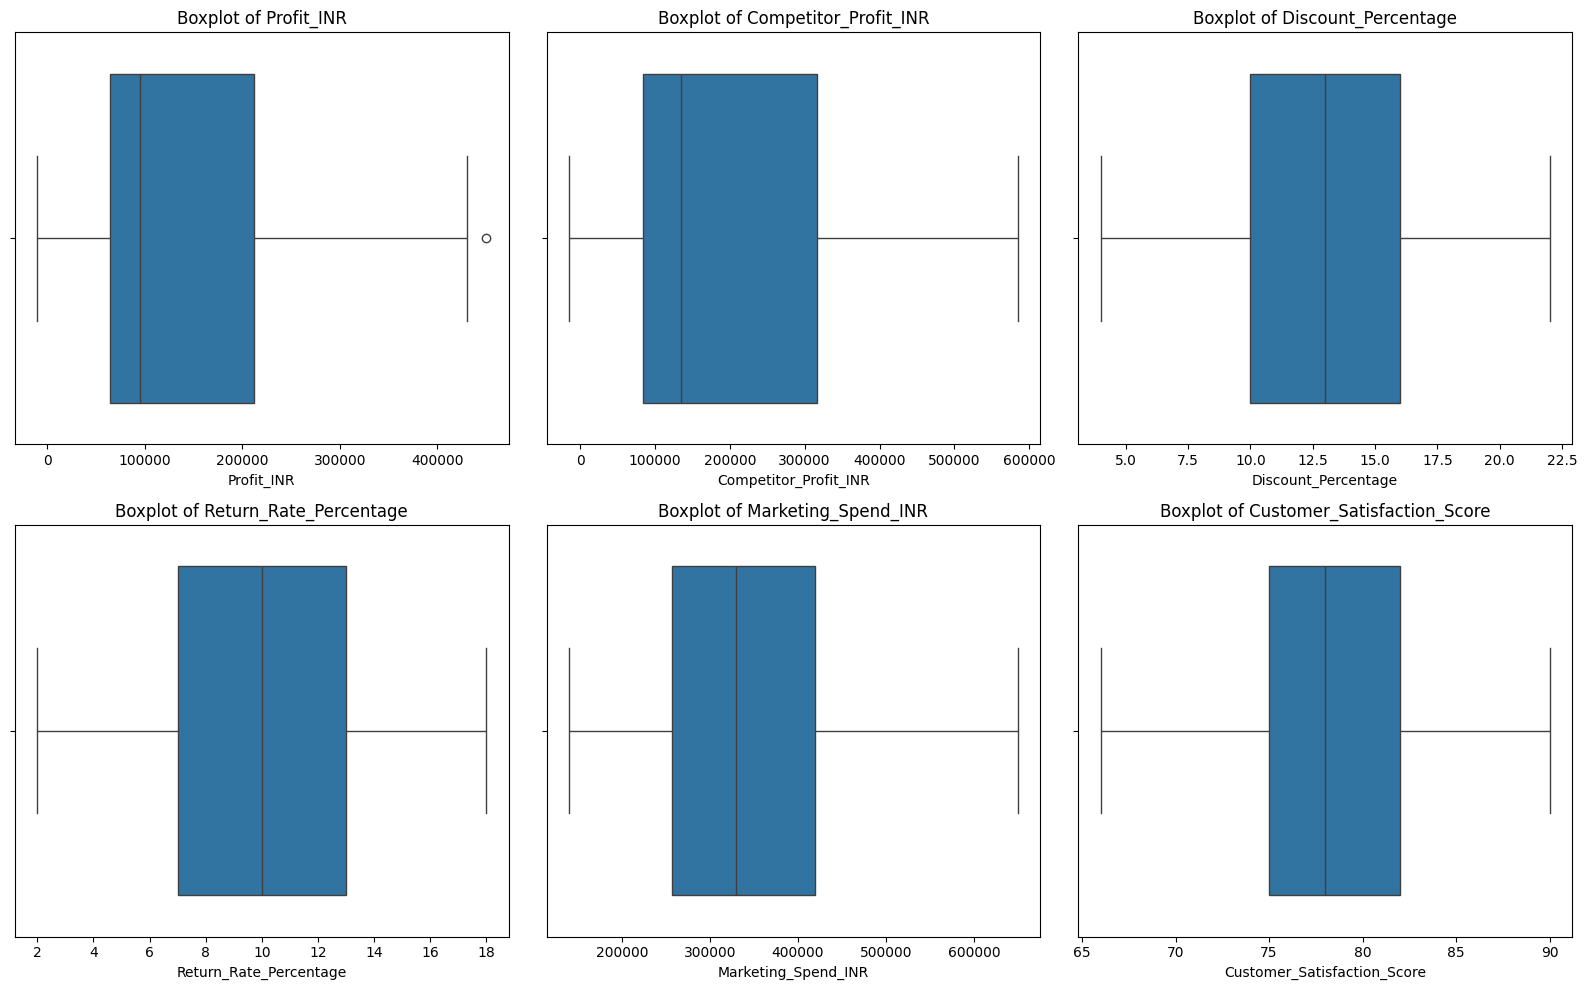

In [54]:
#Checking for outliner values in any of our numerical columns

plt.figure(figsize=(16, 10))

numeric_columns = [
    'Profit_INR', 'Competitor_Profit_INR', 'Discount_Percentage',
    'Return_Rate_Percentage', 'Marketing_Spend_INR', 'Customer_Satisfaction_Score'
]

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

- We can see that there is one upper bound outliner in the Profit_INR column (represented by the circle beyond the right vertical bar)

- We should confirm this outliner using the IQR (Interquartile Range) method which works as follows-

    Q1 = 25th percentile, Q3 = 75th percentile


    IQR = Q3 - Q1


    Anything below Q1 - 1.5*IQR or above Q3 + 1.5*IQR is considered an outlier.

In [55]:
# Outlier detection for Profit_INR
Q1 = df['Profit_INR'].quantile(0.25)
Q3 = df['Profit_INR'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Profit_INR'] < lower_bound) | (df['Profit_INR'] > upper_bound)]

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of outliers: {len(outliers)}")
outliers[['Month', 'Product_Category', 'Profit_INR']]


Lower Bound: -156250.0
Upper Bound: 433750.0
Number of outliers: 1


,Month,Product_Category,Profit_INR
0,Jan-2024,Face_Serum,450000


- We can see that there is one outliner in Profit_INR

- Since it is just one outliner in the entire dataset, and it is slightly higher than the upper bound (450000 vs 433750) we can afford to ignore this outliner and proceed with further analysis safely!

## __Data Analysis__

### 1. Checking GlowNest's Profit Trend Over Time

In [56]:
#Converting the month column to datetime datatype
df['Month'] = pd.to_datetime(df['Month'], format='%b-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Month                        300 non-null    datetime64[ns]
 1   Product_Category             300 non-null    object        
 2   Sales_Volume                 300 non-null    int64         
 3   Revenue_INR                  300 non-null    int64         
 4   Marketing_Spend_INR          300 non-null    int64         
 5   Discount_Percentage          300 non-null    int64         
 6   Return_Rate_Percentage       300 non-null    int64         
 7   Customer_Satisfaction_Score  300 non-null    int64         
 8   Inventory_Turnover_Days      300 non-null    int64         
 9   Customer_Age_Group           300 non-null    object        
 10  Region                       300 non-null    object        
 11  Online_Sales_Percentage      300 non-null    

In [57]:
# Aggregate total profit per month
monthly_profit = df.groupby('Month', as_index=False)['Profit_INR'].sum()
monthly_profit

,Month,Profit_INR
0,2024-01-01,4835000
1,2024-02-01,4575000
2,2024-03-01,4320000
3,2024-04-01,4120000
4,2024-05-01,3920000
5,2024-06-01,3720000
6,2024-07-01,3520000
7,2024-08-01,3320000
8,2024-09-01,3120000
9,2024-10-01,2910000


In [58]:
#Sorting values by month (here we already have it sorted in our dataset)
monthly_profit = monthly_profit.sort_values('Month')

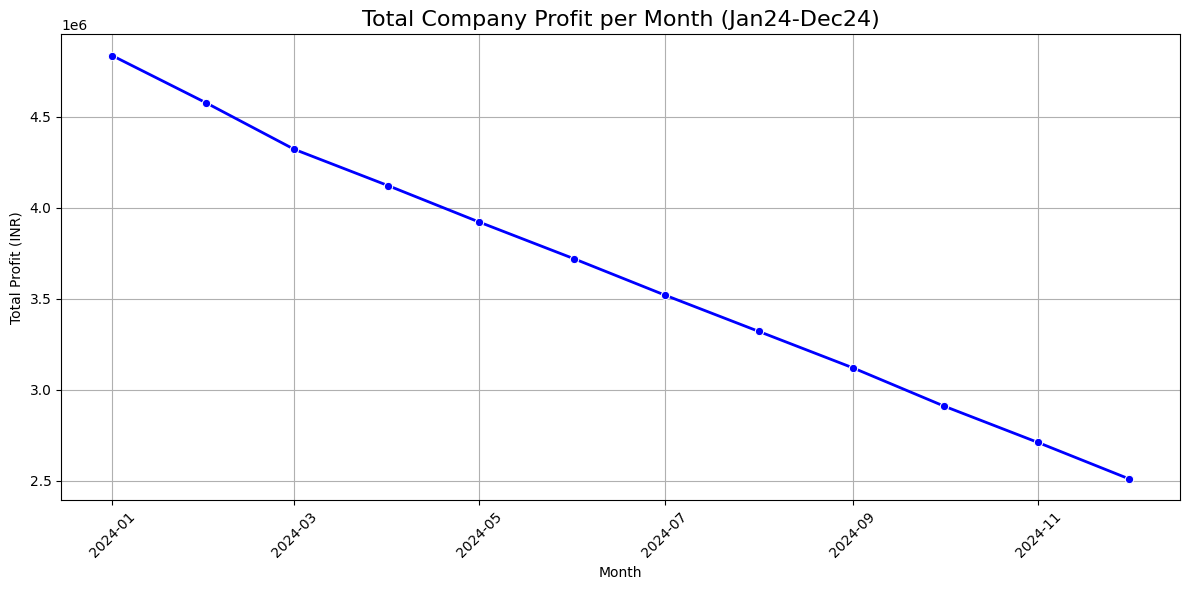

In [59]:
#Line Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_profit, x='Month', y='Profit_INR', marker='o', linewidth=2, color='blue')
plt.title('Total Company Profit per Month (Jan24-Dec24)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Profit (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Observations:<br><br>
    - The total company profit shows a steady and continuous decline each month from January to December 2024.
    - There are no visible periods of stabilization, recovery, or sharp fluctuations; the decrease appears smooth and linear
    - Profit starts above 48 lakh INR in January 2024 and decreases to about 25 lakh INR by December 2024.
    - This represents an approximate 48% reduction in total profit over the year.
    - The persistent decline signals underlying issues such as falling sales, rising costs, or other negative business factors.<br><br>
- Interpretation:<br><br>
    - Immediate investigation into the root causes (e.g., revenue drop, increased expenses, market changes) is warranted to prevent further erosion of profitability.

### 2. Comparing GlowNest's profit with its competitor in the same time frame

#### 2a. Comparing Profits

In [60]:
#AGgregating total profit for both companies
profit_comparison = df.groupby('Month', as_index=False).agg({
    'Profit_INR': 'sum',
    'Competitor_Profit_INR': 'sum'})
profit_comparison

,Month,Profit_INR,Competitor_Profit_INR
0,2024-01-01,4835000,6752500
1,2024-02-01,4575000,6389500
2,2024-03-01,4320000,6033000
3,2024-04-01,4120000,5749000
4,2024-05-01,3920000,5465000
5,2024-06-01,3720000,5181000
6,2024-07-01,3520000,4897000
7,2024-08-01,3320000,4613000
8,2024-09-01,3120000,4329000
9,2024-10-01,2910000,4030000


In [61]:
# Sort by Month
profit_comparison = profit_comparison.sort_values('Month')

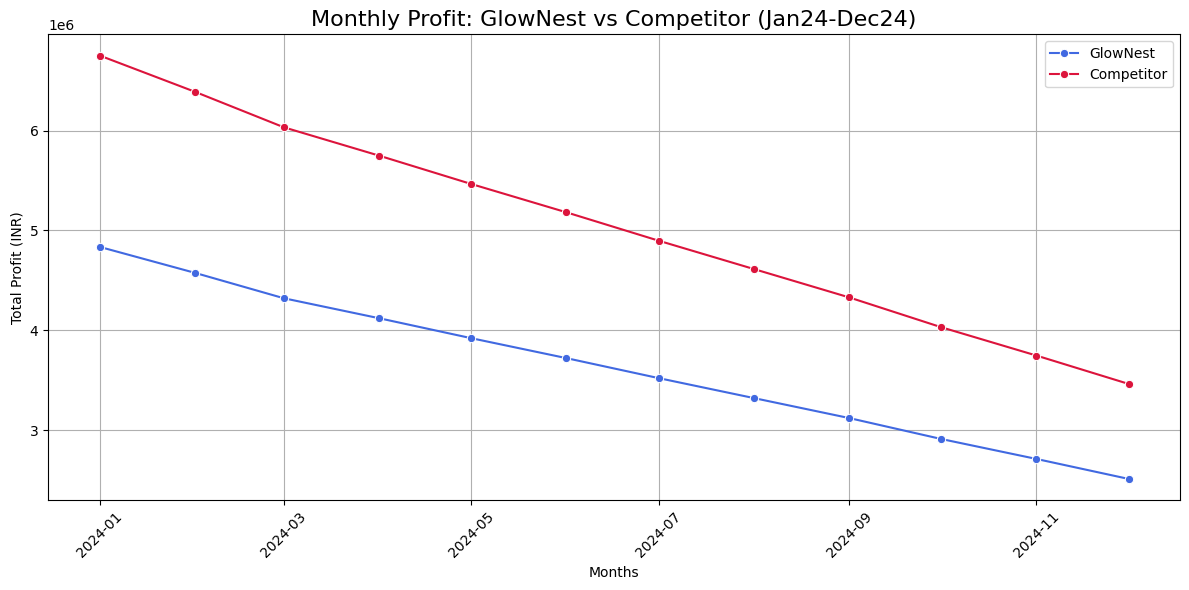

In [62]:
# Plotting both trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=profit_comparison, x='Month', y='Profit_INR', label='GlowNest', marker='o', color='royalblue')
sns.lineplot(data=profit_comparison, x='Month', y='Competitor_Profit_INR', label='Competitor', marker='o', color='crimson')
plt.title('Monthly Profit: GlowNest vs Competitor (Jan24-Dec24)', fontsize=16)
plt.xlabel('Months')
plt.ylabel('Total Profit (INR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Observations:<br><br>
    - Both GlowNest (blue line) and the competitor (red line) exhibit consistent downward profit trajectories throughout 2024.
    - Starting Position (Jan 2024): Competitor had a significant advantage with ~66 lakh INR vs GlowNest's ~48 lakh INR (38% higher).
    - Ending Position (Dec 2024): Competitor maintains lead with ~3.5 million INR vs GlowNest's ~2.5 million INR (40% higher).
    - GlowNest: Declined from 48 lakh to 25 lakh INR (48% decrease).
    - Competitor: Declined from 66 lakh to 35 lakh INR (47% decrease).
    - The competitor always maintained a lead in terms of absolute profit in a month but the absolute gap between the companies has narrowed from 18 lakh INR (Jan24) to 10 lakh INR (Dec24).

#### 2b. Profit & Marketing Spend Comparison

In [63]:
# Grouping profits of both companies & GlowNest's marketing spend
monthly_summary = df.groupby('Month', as_index=False).agg({
    'Profit_INR': 'sum',
    'Competitor_Profit_INR': 'sum',
    'Marketing_Spend_INR': 'sum'})
monthly_summary

,Month,Profit_INR,Competitor_Profit_INR,Marketing_Spend_INR
0,2024-01-01,4835000,6752500,5830000
1,2024-02-01,4575000,6389500,6230000
2,2024-03-01,4320000,6033000,6630000
3,2024-04-01,4120000,5749000,8850000
4,2024-05-01,3920000,5465000,7350000
5,2024-06-01,3720000,5181000,7750000
6,2024-07-01,3520000,4897000,8150000
7,2024-08-01,3320000,4613000,8600000
8,2024-09-01,3120000,4329000,9000000
9,2024-10-01,2910000,4030000,11350000


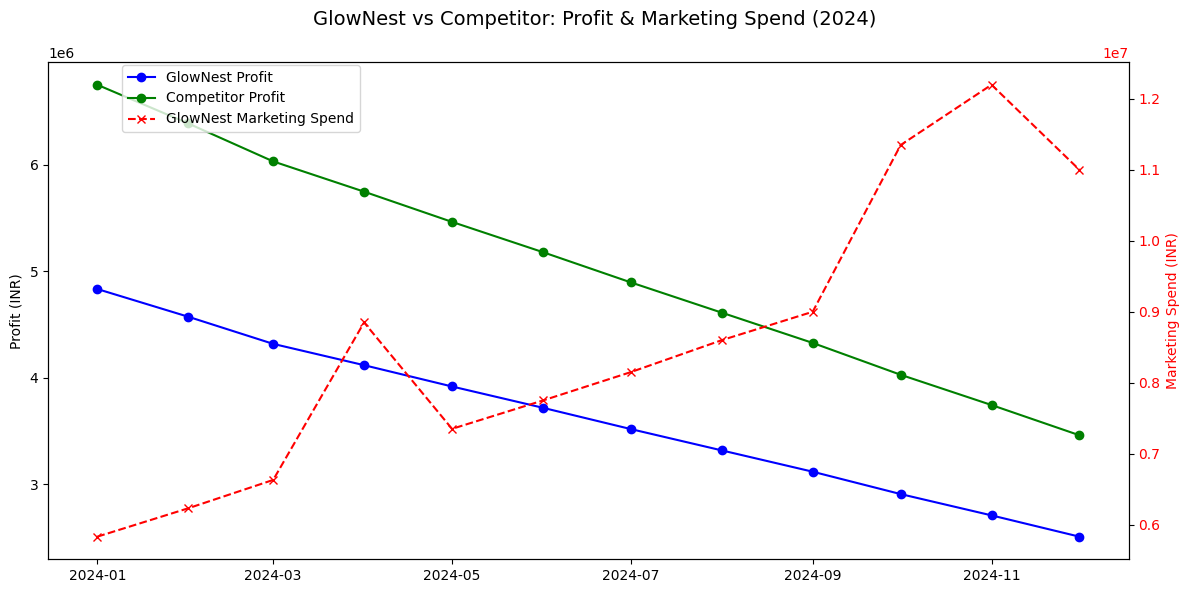

In [64]:
# Plotting Profit vs Competitor with Marketing Spend
fig, ax1 = plt.subplots(figsize=(12, 6))

# Profit Lines
ax1.plot(monthly_summary['Month'], monthly_summary['Profit_INR'], label='GlowNest Profit', color='blue', marker='o')
ax1.plot(monthly_summary['Month'], monthly_summary['Competitor_Profit_INR'], label='Competitor Profit', color='green', marker='o')
ax1.set_ylabel('Profit (INR)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Twin axis for Marketing Spend
ax2 = ax1.twinx()
ax2.plot(monthly_summary['Month'], monthly_summary['Marketing_Spend_INR'], label='GlowNest Marketing Spend', color='red', linestyle='--', marker='x')
ax2.set_ylabel('Marketing Spend (INR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legends
fig.suptitle('GlowNest vs Competitor: Profit & Marketing Spend (2024)', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Observations:<br><br>
    - The competitor’s profit (green line) remains above GlowNest’s (blue line) throughout the year, mirroring the trend in the first plot.
    - GlowNest’s marketing spend (red dashed line, right axis) rises sharply from mid-year, peaking in November–December at over 12 million INR, while profit continues to decline.
    - There is no visible positive impact of increased marketing spend on GlowNest’s profit; in fact, the decline in profit persists despite higher investment.<br><br>
- Interpretation:<br><br>
    - The competitor’s sustained profit advantage is likely due in part to lower marketing costs, as GlowNest’s aggressive spending does not translate into improved profitability.
    - GlowNest’s marketing investments are not yielding proportional returns, indicating inefficiency or ineffective campaign strategies.
    - The data suggests that the competitor is achieving higher profit margins through better cost control, especially in marketing, and possibly more effective allocation of marketing resources.<br><br>
- Summary:<br><br>
Throughout 2024, GlowNest consistently spends heavily on marketing, but still underperforms in profit compared to its competitor. Despite monthly investments exceeding several crores, GlowNest’s profits remain below the competitor’s — indicating that GlowNest’s marketing strategies are not yielding competitive returns. The competitor appears to achieve higher profits with likely lower marketing costs (data unavailable). This gap highlights a key inefficiency and suggests GlowNest must critically reassess its spend-to-profit strategy.

### 3. Marketing ROI Analysis

#### 3a. Marketing ROI Analysis (Monthly)

In [65]:
# Calculate monthly totals
monthly_roi = df.groupby('Month', as_index=False).agg({
    'Revenue_INR': 'sum',
    'Marketing_Spend_INR': 'sum'})

In [66]:
# Calculate Marketing ROI
monthly_roi['Marketing_ROI'] = (
    (monthly_roi['Revenue_INR'] - monthly_roi['Marketing_Spend_INR']) 
    / monthly_roi['Marketing_Spend_INR'])
monthly_roi

,Month,Revenue_INR,Marketing_Spend_INR,Marketing_ROI
0,2024-01-01,31370000,5830000,4.380789
1,2024-02-01,29920000,6230000,3.802568
2,2024-03-01,28630000,6630000,3.318250
3,2024-04-01,28820000,8850000,2.256497
4,2024-05-01,27370000,7350000,2.723810
5,2024-06-01,26270000,7750000,2.389677
6,2024-07-01,25420000,8150000,2.119018
7,2024-08-01,24280000,8600000,1.823256
8,2024-09-01,23430000,9000000,1.603333
9,2024-10-01,31470000,11350000,1.772687


In [67]:
# Sort by Month
monthly_roi = monthly_roi.sort_values('Month')

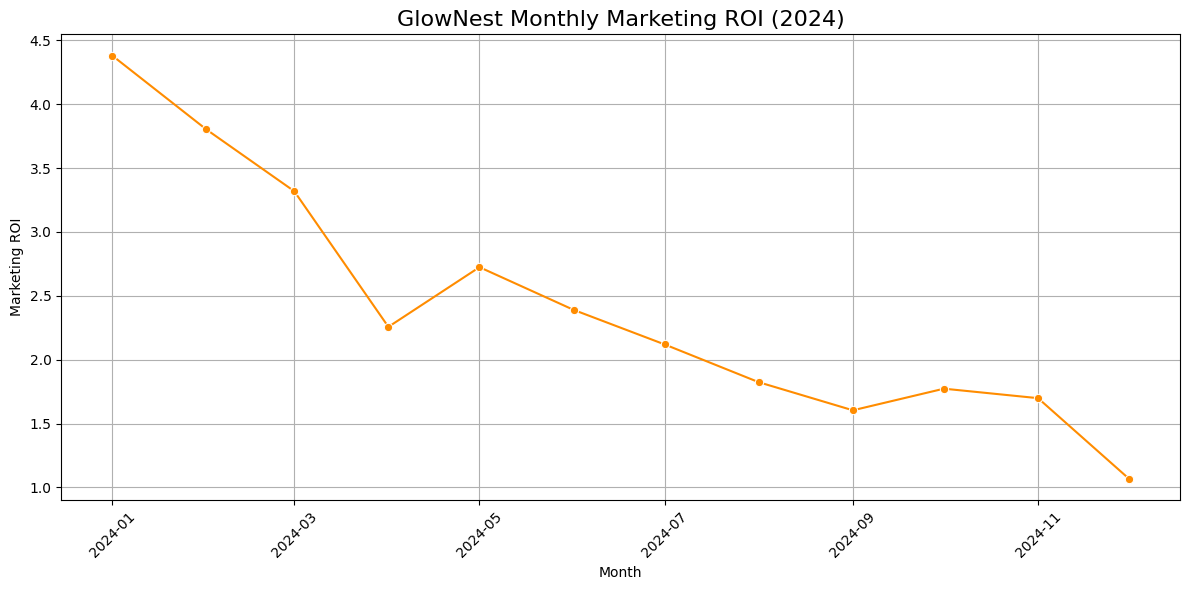

In [68]:
#Plot marketing ROI
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_roi, x='Month', y='Marketing_ROI', marker='o', color='darkorange')
plt.title('GlowNest Monthly Marketing ROI (2024)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Marketing ROI')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Observation: 
    - Consistent Decline: Marketing ROI steadily decreases throughout 2024, starting at approximately 4.4 in January and dropping to just above 1.0 by December. This indicates that for every unit spent on marketing, the returns are shrinking month by month.
    - Brief Recovery: There is a minor uptick in May, where ROI rises from April’s low (~2.3) to around 2.7, but this improvement is short-lived. The overall trend quickly resumes its downward trajectory.
    - No Sustained Gains: After May, ROI continues to fall, with only minor and temporary fluctuations (e.g., small rises in October and November), but none reverse the overall decline.
    - End-of-Year Low: By December, ROI is at its lowest point of the year, signaling that marketing investments are yielding significantly diminished returns compared to the beginning of the year.
<br>
<br>

- Interpretation: Is High Marketing Spend Yielding Sufficient Returns?
    - Insufficient Returns: The sharp and sustained drop in marketing ROI strongly suggests that increased or sustained marketing spend is not translating into proportional gains. Each rupee spent is generating less return as the year progresses.
    - Potential Causes: This collapse may be due to market saturation, ineffective campaign strategies, increased competition, or diminishing marginal returns on marketing investments.
    - Actionable Insight: Immediate review of marketing strategies and spend allocation is recommended. Consider optimizing or reallocating budgets, experimenting with new channels, or analyzing campaign effectiveness at a granular level to identify underperforming areas
<br>
<br>
- Summary:<br><br>
GlowNest’s marketing ROI collapse in 2024 indicates that high marketing spend is not yielding sufficient returns. The trend calls for urgent strategic reassessment to prevent further erosion of marketing efficiency and overall profitability.

#### 3b. Marketing ROI Analysis (Category-wise)

In [69]:
# Group by Product Category and calculate total Revenue and Marketing Spend
category_roi = df.groupby('Product_Category', as_index=False).agg({
    'Revenue_INR': 'sum',
    'Marketing_Spend_INR': 'sum'})

In [70]:
# Calculate Marketing ROI
category_roi['Marketing_ROI'] = (
    (category_roi['Revenue_INR'] - category_roi['Marketing_Spend_INR']) 
    / category_roi['Marketing_Spend_INR'])
category_roi

,Product_Category,Revenue_INR,Marketing_Spend_INR,Marketing_ROI
0,Body_Wash,46350000,21050000,1.201900
1,Face_Mask,36360000,17340000,1.096886
2,Face_Serum,143200000,26500000,4.403774
3,Lip_Balm,20200000,14000000,0.442857
4,Shampoo,86520000,24050000,2.597505


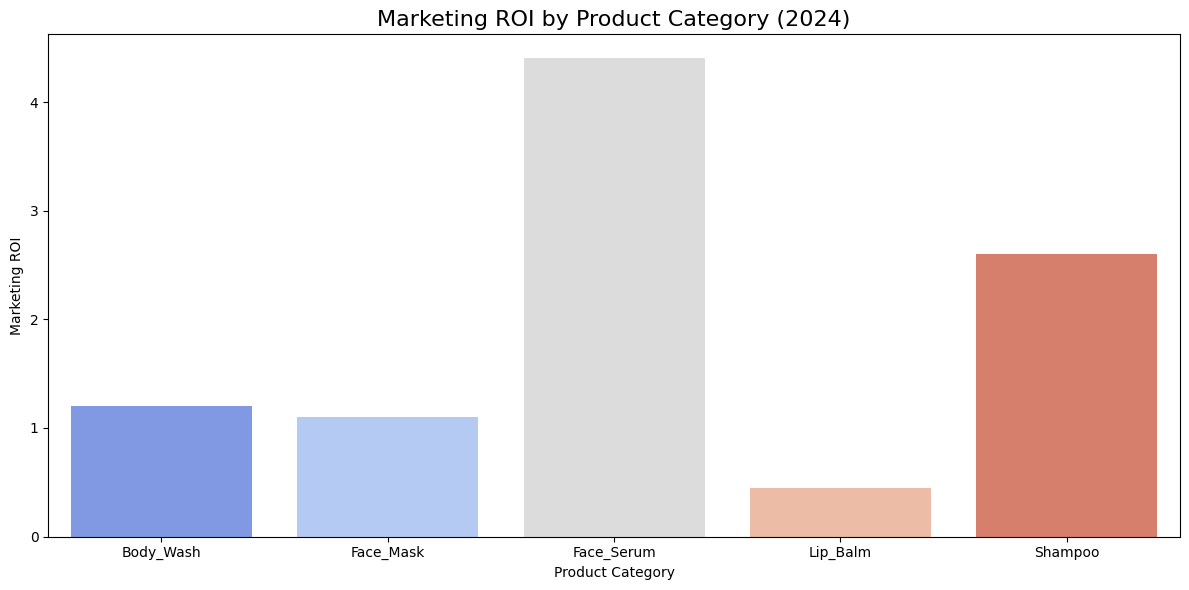

In [71]:
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=category_roi, x='Product_Category', y='Marketing_ROI', palette='coolwarm')
plt.title('Marketing ROI by Product Category (2024)', fontsize=16)
plt.ylabel('Marketing ROI')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

- Observations:<br><br>
    - Face Serum Outperforms All Categories: Face Serum has the highest marketing ROI by a significant margin, exceeding 4.4. This indicates exceptionally efficient marketing spend for this product, with returns far outpacing other categories.
    - Shampoo Shows Solid Performance: Shampoo ranks second, with an ROI around 2.6. Marketing investments here are also yielding strong returns, though not at the level of Face Serum.
    - Body Wash and Face Mask Deliver Modest Returns: Both Body Wash (ROI ~1.2) and Face Mask (ROI ~1.1) are just above breakeven, suggesting that marketing spend is only marginally effective in these categories.
    - ROI of 0.44 means GlowNest is losing money on Lip Balm marketing. This is likely a profit sink and must be investigated.
<br><br>
- Probable Strategies:<br><br>
    - Focus on High-ROI Categories: Face Serum and Shampoo are clear leaders. Consider increasing marketing investment in these categories to maximize overall returns.
    - Reevaluate Low-ROI Categories: Marketing strategies for Lip Balm, Body Wash, and Face Mask should be reviewed. For Lip Balm in particular, either optimize campaigns or consider reallocating budget to higher-performing categories.
    - Resource Allocation: This analysis suggests a data-driven approach to marketing budget allocation: prioritize products with proven ROI and investigate underperformance in weaker categories.
<br><br>
- Summary:<br><br> Category-wise Marketing ROI analysis reveals a stark contrast in efficiency across GlowNest’s product lines. Face Serum and Shampoo offer strong returns, while Lip Balm incurs significant losses, with an ROI below 0.5. This indicates that despite heavy investment, certain categories are not yielding sufficient revenue. Strategic reallocation of marketing spend and targeted campaign audits are essential to restore overall ROI health.

### 4. Discount Spiral Analysis

In [72]:
# Monthly average discount %
monthly_discount = df.groupby('Month')['Discount_Percentage'].mean().reset_index()
monthly_profit = df.groupby('Month')['Profit_INR'].sum().reset_index()

In [73]:
# Profit vs discount
comparison = df.groupby('Month', as_index=False).agg({
    'Discount_Percentage': 'mean',
    'Profit_INR': 'sum'})
comparison

,Month,Discount_Percentage,Profit_INR
0,2024-01-01,7.28,4835000
1,2024-02-01,8.28,4575000
2,2024-03-01,9.28,4320000
3,2024-04-01,10.28,4120000
4,2024-05-01,11.28,3920000
5,2024-06-01,12.28,3720000
6,2024-07-01,13.28,3520000
7,2024-08-01,14.28,3320000
8,2024-09-01,15.28,3120000
9,2024-10-01,16.28,2910000


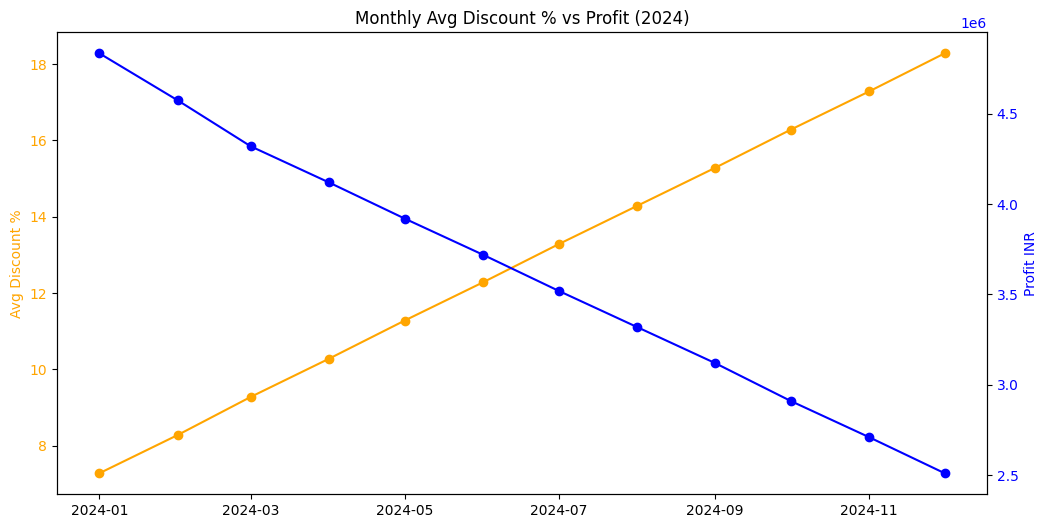

In [74]:
# Plot discount % and profit over months
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(monthly_discount['Month'], monthly_discount['Discount_Percentage'], color='orange', marker='o', label='Avg Discount %')
ax1.set_ylabel('Avg Discount %', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
ax2.plot(monthly_profit['Month'], monthly_profit['Profit_INR'], color='blue', marker='o', label='Total Profit')
ax2.set_ylabel('Profit INR', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Monthly Avg Discount % vs Profit (2024)')
plt.xticks(rotation=45)
plt.show()

- Observations:<br><br>
    - The orange line (left axis) shows the average discount percentage rising steadily from about 7% in January to over 18% by December.
    - The blue line (right axis) indicates profit falling sharply from around 4.8 million INR to about 2.5 million INR over the same period.
    - The two lines move in opposite directions: as discounts increase, profits decrease almost linearly.<br><br>
- Interpretation:<br><br>
    - There is a clear inverse relationship between discounting and profit at the monthly level.
    - The rising discount strategy is not stimulating enough additional sales to offset the loss in margin, resulting in eroded profits.
    - This pattern suggests that continued increases in discounting are directly contributing to declining profit margins.<br><br>



In [75]:
# Correlation analysis between discount % and profit at record level
corr = df[['Discount_Percentage', 'Profit_INR']].corr()
# Print the correlation matrix
print(corr)

                     Discount_Percentage  Profit_INR
Discount_Percentage             1.000000   -0.160155
Profit_INR                     -0.160155    1.000000


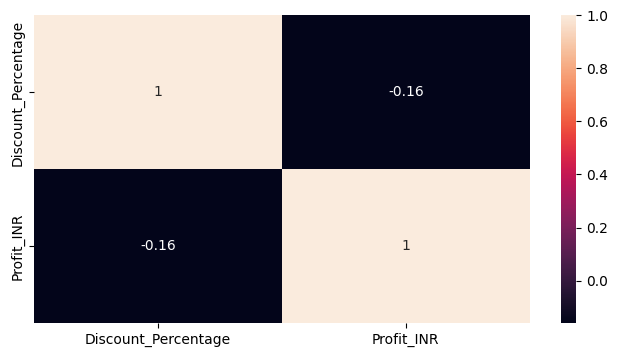

In [76]:
#Heatmap
matplotlib.rcParams['figure.figsize'] = (8,4)
sns.heatmap(corr, annot=True)
plt.show()

In [77]:
corr_ = df[['Discount_Percentage', 'Profit_INR']].corr().iloc[0,1]
print(f"Correlation between Discount % and Profit: {corr_:.3f}")

Correlation between Discount % and Profit: -0.160


- Observations:<br><br>
    - The heatmap shows a correlation coefficient of -0.16 between Discount Percentage and Profit INR.
    - This negative value, while not extremely strong, indicates a consistent inverse relationship: higher discounts are associated with lower profits.<br><br>
- Interpretation:<br><br>
    - The negative correlation confirms the trend seen in the monthly plot but suggests that other factors may also be influencing profit.
    - Discounting, on its own, is having a detrimental effect on profit, but it is not the sole driver of profit changes.
<br><br>



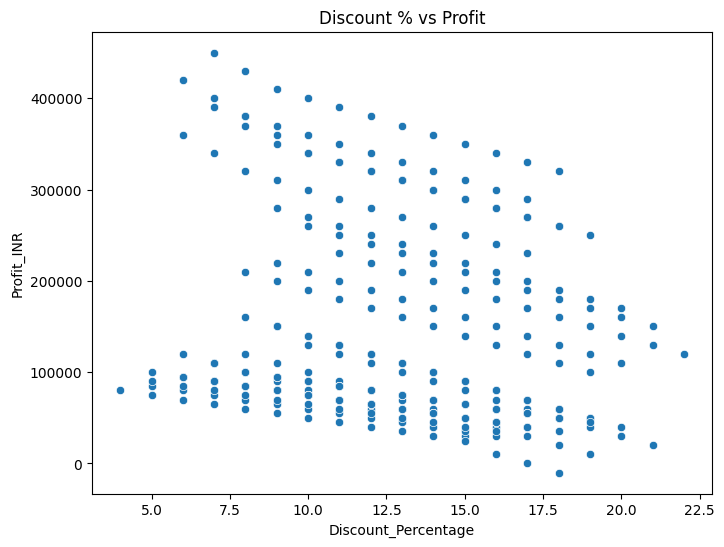

In [78]:
# Scatter plot for discount % vs profit
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Discount_Percentage', y='Profit_INR')
plt.title('Discount % vs Profit')
plt.show()

- Observations:<br><br>
    - The scatter plot reveals a downward trend: as discount percentage increases, profit values become more concentrated at lower levels.
    - There are fewer high-profit data points at higher discount percentages, and the spread of profit narrows as discounts rise.<br><br>
- Interpretation:<br><br>
    - The scatter plot visually reinforces the negative relationship: aggressive discounting is rarely associated with high profits.
    - This pattern is consistent across individual transactions or stores, not just at the aggregate level.<br><br>
- Summary:<br><br>
GlowNest’s increasing discount strategy over 2024 appears to be eroding profit margins somewhat, but the impact is moderate based on correlation. This suggests that discounting is one of several factors reducing profitability and warrants further investigation alongside other causes.
<br><br>

### 5. Quality Crisis Analysis

#### 5a. Return rate % vs Profit (Monthly)

In [79]:
# Monthly avg return rate and profit
monthly_returns = df.groupby('Month')['Return_Rate_Percentage'].mean().reset_index()
monthly_profit = df.groupby('Month')['Profit_INR'].sum().reset_index()

In [80]:
# Profit vs return rate
comparison = df.groupby('Month', as_index=False).agg({
    'Return_Rate_Percentage': 'mean',
    'Profit_INR': 'sum'})
comparison

,Month,Return_Rate_Percentage,Profit_INR
0,2024-01-01,4.2,4835000
1,2024-02-01,5.2,4575000
2,2024-03-01,6.2,4320000
3,2024-04-01,7.2,4120000
4,2024-05-01,8.2,3920000
5,2024-06-01,9.2,3720000
6,2024-07-01,10.2,3520000
7,2024-08-01,11.2,3320000
8,2024-09-01,12.2,3120000
9,2024-10-01,13.2,2910000


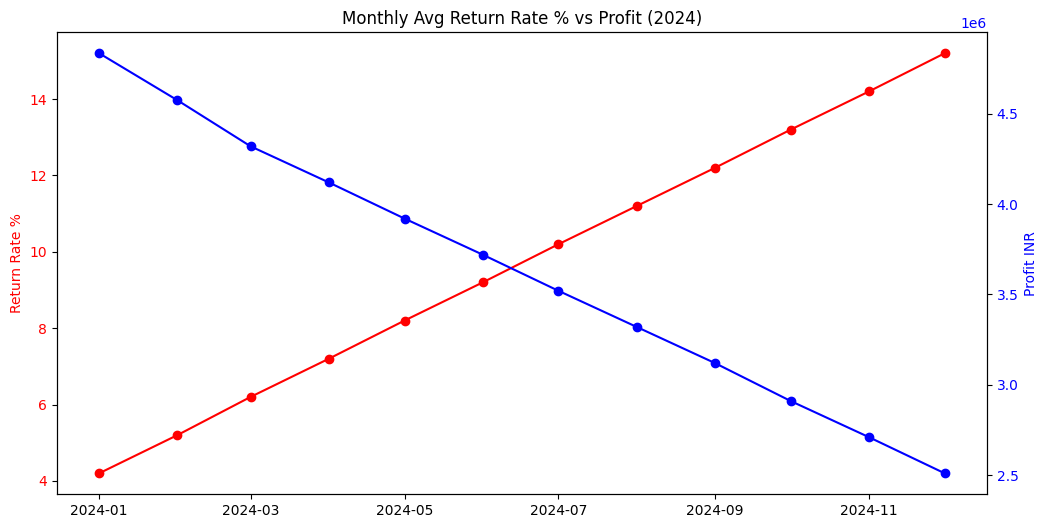

In [81]:
# Plot return rates and profit
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(monthly_returns['Month'], monthly_returns['Return_Rate_Percentage'], color='red', marker='o', label='Avg Return Rate %')
ax1.set_ylabel('Return Rate %', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(monthly_profit['Month'], monthly_profit['Profit_INR'], color='blue', marker='o', label='Total Profit')
ax2.set_ylabel('Profit INR', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Monthly Avg Return Rate % vs Profit (2024)')
plt.xticks(rotation=45)
plt.show()

- Observations:<br><br>
    - The average monthly return rate (%) rises steadily from about 4% in January to over 15% by December.
    - In contrast, monthly profit (INR) declines sharply from approximately 48 lakh to around 25 lakh over the same period.
    - The two lines move in opposite directions, forming a clear inverse relationship: as return rates increase, profits decrease.
<br><br>
- Interpretation:<br><br>
    - The consistent rise in return rates is strongly associated with falling profits.
    - This pattern suggests that higher product returns are directly eroding profit margins each month.
    - The trend may indicate underlying quality issues, supply chain problems, or customer dissatisfaction leading to more returns.
<br><br>

In [82]:
# Correlation analysis between return rate and profit at record level
corr = df[['Return_Rate_Percentage', 'Profit_INR']].corr()
# Print the correlation matrix
print(corr)

                        Return_Rate_Percentage  Profit_INR
Return_Rate_Percentage                1.000000   -0.206577
Profit_INR                           -0.206577    1.000000


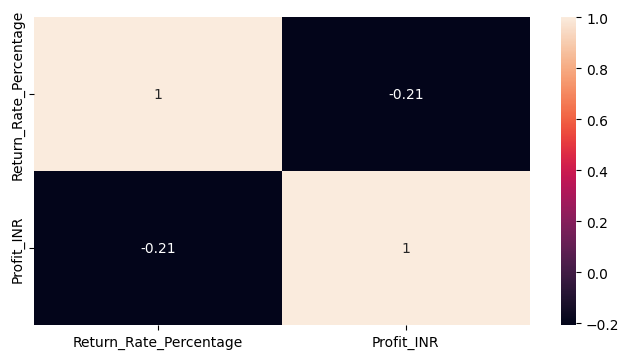

In [83]:
#Heatmap
matplotlib.rcParams['figure.figsize'] = (8,4)
sns.heatmap(corr, annot=True)
plt.show()

In [84]:
# Correlation between Return Rate and Profit
corr_return_profit = df[['Return_Rate_Percentage', 'Profit_INR']].corr().iloc[0,1]
print(f"Correlation between Return Rate % and Profit: {corr_return_profit:.3f}")

Correlation between Return Rate % and Profit: -0.207


- Observations:<br><br>
    - The heatmap shows a correlation coefficient of -0.21 between Return Rate Percentage and Profit INR.
<br><br>
- Interpretation:<br><br>
    - The negative correlation confirms that higher return rates are associated with lower profits.
    - While the relationship is moderate (not extremely strong), it is consistent and statistically meaningful at the monthly level.<br><br>

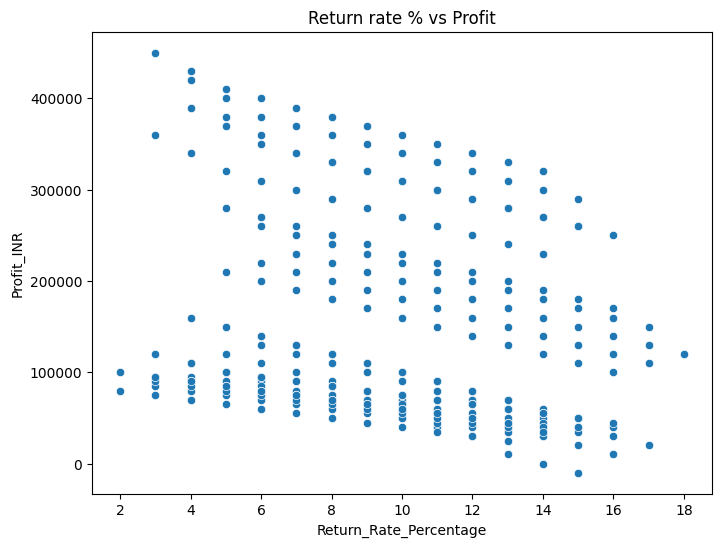

In [85]:
# Scatter plot for return rate % vs profit
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Return_Rate_Percentage', y='Profit_INR')
plt.title('Return rate % vs Profit')
plt.show()

- Observations:<br><br>
    - The scatter plot displays a clear downward trend: as return rate percentage increases, profit values cluster at lower levels.
    - High profits are rarely observed at high return rates, and the spread of profit narrows as return rates rise.
<br><br>
- Interpretation:<br><br>
    - This visual reinforces the negative association between return rates and profit, supporting the conclusion that increasing returns are detrimental to profitability.
    - The effect is evident across individual data points, not just in aggregate.<br><br>

- Summary: <br><br>
Across all analyses, there is strong evidence that rising product return rates are eroding GlowNest’s profit margins. The consistent monthly trend, negative correlation, and scatter plot pattern all point to a quality crisis: as returns increase, profits fall. This relationship suggests that product quality issues, fulfillment errors, or customer dissatisfaction are leading to more returns, which in turn are putting significant pressure on the company’s financial performance. Addressing the root causes of high return rates—such as improving product quality, enhancing customer support, or tightening quality control—should be a top priority to restore profitability and protect long-term business health.

#### 5b. Customer_Satisfaction_Score vs Profit (Monthly)

In [86]:
# Monthly avg Customer_Satisfaction_Score and profit
monthly_score = df.groupby('Month')['Customer_Satisfaction_Score'].mean().reset_index()
monthly_profit = df.groupby('Month')['Profit_INR'].sum().reset_index()

In [87]:
# Profit vs Customer_Satisfaction_Score
comparison = df.groupby('Month', as_index=False).agg({
    'Customer_Satisfaction_Score': 'mean',
    'Profit_INR': 'sum'})
comparison

,Month,Customer_Satisfaction_Score,Profit_INR
0,2024-01-01,83.72,4835000
1,2024-02-01,82.72,4575000
2,2024-03-01,81.72,4320000
3,2024-04-01,80.72,4120000
4,2024-05-01,79.72,3920000
5,2024-06-01,78.72,3720000
6,2024-07-01,77.72,3520000
7,2024-08-01,76.72,3320000
8,2024-09-01,75.72,3120000
9,2024-10-01,74.72,2910000


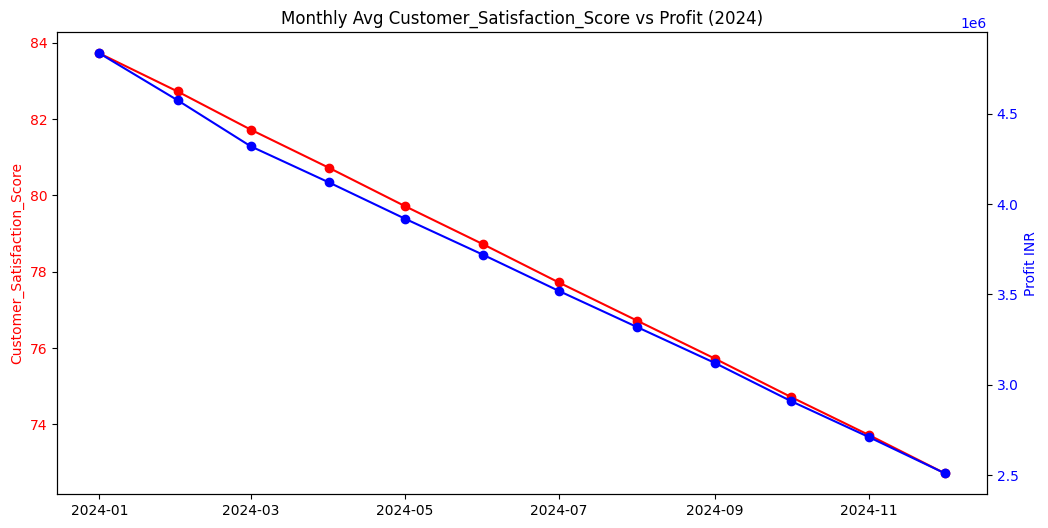

In [88]:
# Plot satisfaction score and profit
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(monthly_score['Month'], monthly_score['Customer_Satisfaction_Score'], color='red', marker='o', label='Avg Return Rate %')
ax1.set_ylabel('Customer_Satisfaction_Score', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(monthly_profit['Month'], monthly_profit['Profit_INR'], color='blue', marker='o', label='Total Profit')
ax2.set_ylabel('Profit INR', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Monthly Avg Customer_Satisfaction_Score vs Profit (2024)')
plt.xticks(rotation=45)
plt.show()

- Observations:<br><br>
    - Both customer satisfaction score (red line, left axis) and profit (blue line, right axis) decline steadily from January to December 2024.
    - Customer satisfaction drops from about 84 to 73, while profit falls from around 4.8 million INR to 2.5 million INR.
    - The decrease in both metrics is nearly parallel and linear, with no months showing a reversal or stabilization in either trend.
<br><br>
- Interpretation:<br><br>
    - The synchronized decline suggests a potential link: as customer satisfaction deteriorates, profits also shrink.
    - This parallel movement implies that issues affecting customer experience—such as product quality, service, or value—may be contributing to profit erosion.<br><br>

In [89]:
# Correlation analysis between Customer_Satisfaction_Score and profit at record level
corr = df[['Customer_Satisfaction_Score', 'Profit_INR']].corr()
# Print the correlation matrix
print(corr)

                             Customer_Satisfaction_Score  Profit_INR
Customer_Satisfaction_Score                     1.000000    0.170909
Profit_INR                                      0.170909    1.000000


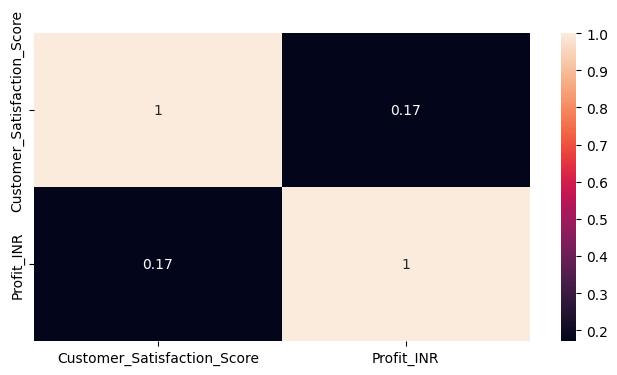

In [90]:
#Heatmap
matplotlib.rcParams['figure.figsize'] = (8,4)
sns.heatmap(corr, annot=True)
plt.show()

In [91]:
# Correlation between Customer_Satisfaction_Score and Profit
corr_return_profit = df[['Customer_Satisfaction_Score', 'Profit_INR']].corr().iloc[0,1]
print(f"Correlation between Customer_Satisfaction_Score and Profit: {corr_return_profit:.3f}")

Correlation between Customer_Satisfaction_Score and Profit: 0.171


- Observations:<br><br>
    - The correlation coefficient between customer satisfaction score and profit is 0.17.
    - This is a weak but positive correlation, indicating that higher satisfaction is generally associated with higher profits, though the relationship is not particularly strong.
<br><br>
- Interpretation:<br><br>
    - While the correlation is not strong, it is positive and consistent with the monthly trend plot.
    - This suggests that customer satisfaction does play a role in profit levels, but other factors are also influencing profitability.<br><br>

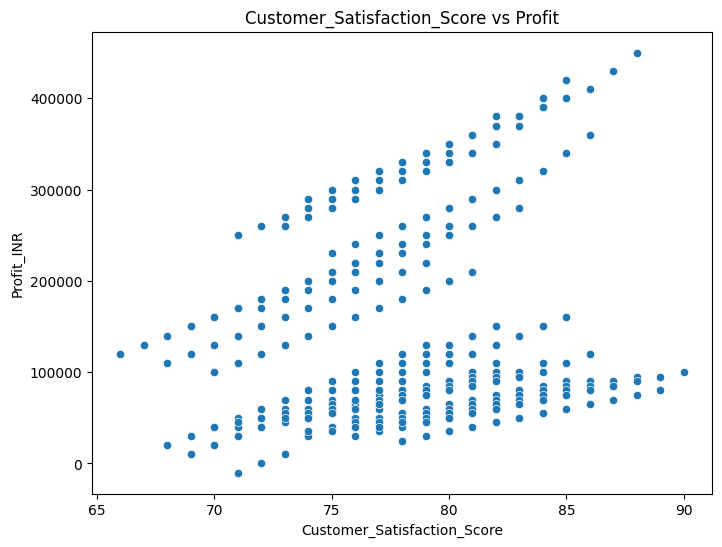

In [92]:
# Scatter plot for Customer_Satisfaction_Score vs profit
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Customer_Satisfaction_Score', y='Profit_INR')
plt.title('Customer_Satisfaction_Score vs Profit')
plt.show()

- Observations:<br><br>
    - The scatter plot shows a loose upward trend: higher customer satisfaction scores are associated with higher profit values.
    - There is a wide spread of profit values at each satisfaction score, indicating variability, but the overall pattern supports the positive association.
<br><br>
- Interpretation:<br><br>
    - The scatter plot visually reinforces the idea that improving customer satisfaction can help support higher profits, though the relationship is not perfectly linear or exclusive.
    - Variability in the data suggests that while customer satisfaction is important, profit is also affected by additional operational, market, or cost factors.
<br><br>
- Summary:<br>
Both customer satisfaction and profit are declining in parallel month after month, suggesting that deteriorating customer experience is likely contributing to profit loss. The positive, though weak, correlation and the upward trend in the scatter plot indicate that higher customer satisfaction generally supports better profitability. To stem profit decline, GlowNest should prioritize initiatives that improve customer satisfaction, while also investigating and addressing other factors that may be impacting profit margins.<br><br>

### 6. Digital Channel Weakness

In [93]:
# Monthly online sales and profit
monthly_online = df.groupby('Month')['Online_Sales_Percentage'].mean().reset_index()
monthly_profit = df.groupby('Month')['Profit_INR'].sum().reset_index()

In [94]:
# Profit vs Online_Sales_Percentage
comparison = df.groupby('Month', as_index=False).agg({
    'Online_Sales_Percentage': 'mean',
    'Profit_INR': 'sum'})
comparison

,Month,Online_Sales_Percentage,Profit_INR
0,2024-01-01,68.20,4835000
1,2024-02-01,67.16,4575000
2,2024-03-01,66.16,4320000
3,2024-04-01,65.16,4120000
4,2024-05-01,64.16,3920000
5,2024-06-01,63.16,3720000
6,2024-07-01,62.16,3520000
7,2024-08-01,61.16,3320000
8,2024-09-01,60.16,3120000
9,2024-10-01,59.16,2910000


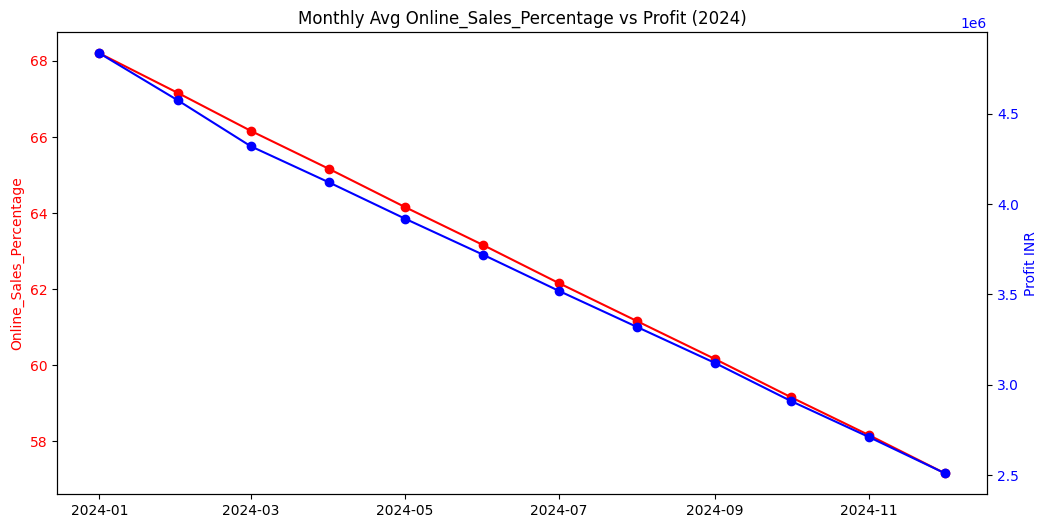

In [95]:
# Plot Online_Sales_Percentage and profit
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(monthly_online['Month'], monthly_online['Online_Sales_Percentage'], color='red', marker='o', label='Avg Return Rate %')
ax1.set_ylabel('Online_Sales_Percentage', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(monthly_profit['Month'], monthly_profit['Profit_INR'], color='blue', marker='o', label='Total Profit')
ax2.set_ylabel('Profit INR', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Monthly Avg Online_Sales_Percentage vs Profit (2024)')
plt.xticks(rotation=45)
plt.show()

- Observations:<br><br>
    - Both the average online sales percentage (red line, left axis) and profit (blue line, right axis) decline steadily from January to December 2024.
    - Online sales percentage drops from about 68% to 57% over the year.
    - Profit falls in parallel, from approximately 48 lakh INR to 25 lakh INR.
    - The two lines closely track each other, with no months showing divergence or reversal in trend.
<br><br>
- Interpretation:<br><br>
    - The synchronized and consistent decline suggests a strong association between the share of online sales and overall profit.
    - As the contribution of online sales shrinks, company profit erodes at a similar rate.
    - This pattern indicates that the digital channel is a key driver of performance, and its weakening is directly linked to the company’s declining profitability.
    - The lack of stabilization or improvement in either metric highlights a persistent and unresolved challenge in the digital channel.<br><br>

In [96]:
# Correlation analysis between Customer_Satisfaction_Score and profit at record level
corr = df[['Online_Sales_Percentage', 'Profit_INR']].corr()
# Print the correlation matrix
print(corr)

                         Online_Sales_Percentage  Profit_INR
Online_Sales_Percentage                 1.000000    0.331809
Profit_INR                              0.331809    1.000000


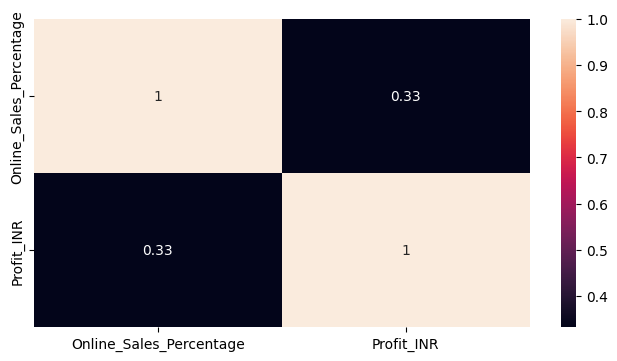

In [97]:
#Heatmap
matplotlib.rcParams['figure.figsize'] = (8,4)
sns.heatmap(corr, annot=True)
plt.show()

In [98]:
# Correlation between Online_Sales_Percentage and Profit
corr_return_profit = df[['Online_Sales_Percentage', 'Profit_INR']].corr().iloc[0,1]
print(f"Correlation between Online_Sales_Percentage and Profit: {corr_return_profit:.3f}")

Correlation between Online_Sales_Percentage and Profit: 0.332


- Observations:<br><br>
    - The correlation coefficient is 0.33, indicating a weak to moderate positive relationship between online sales percentage and profit.
<br><br>
- Interpretation:<br><br>
    - This positive correlation suggests that, in general, higher online sales percentages are associated with higher profits.
    - However, the correlation is not strong, meaning other factors also play a significant role in determining profit.
    - The digital channel is important, but not the sole driver of profitability.<br><br>

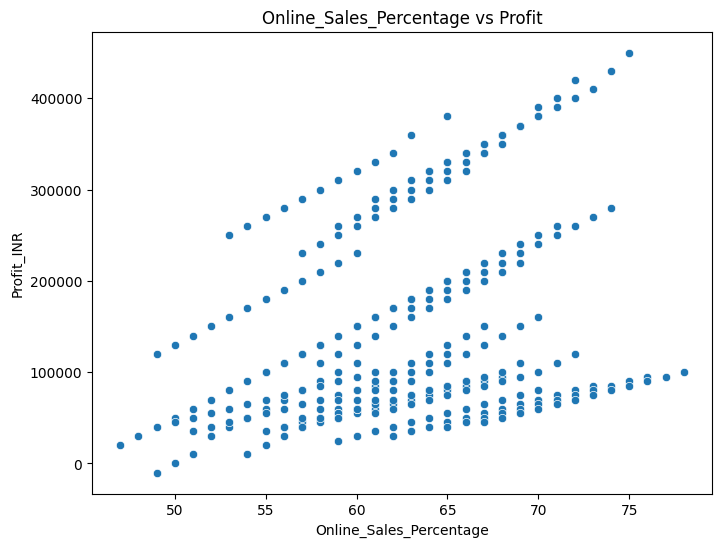

In [99]:
# Scatter plot for Online_Sales_Percentage vs profit
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Online_Sales_Percentage', y='Profit_INR')
plt.title('Online_Sales_Percentage vs Profit')
plt.show()

- Observations:<br>
    - The scatter plot shows a loose upward trend: higher online sales percentages tend to be associated with higher profit values, but data points are widely dispersed.<br><br>

- Interpretation:<br>
    - While there is some positive association, the scatter suggests considerable variability in profit at each level of online sales percentage.
    - This means that maximizing online sales alone will not guarantee higher profits unless other aspects of the business are also managed effectively.
      <br><br>

- Summary:<br><br>
The data shows that declining online sales are likely contributing to GlowNest’s profit decline, but the relationship is not overwhelmingly strong (correlation = 0.33). The digital channel remains a key performance lever, but other operational, market, or customer factors must also be addressed to restore profitability. Strategic focus should include strengthening online sales as well as improving overall business fundamentals.

### 7. Universal Product Decline Analysis

#### 7a. Line Plot - Monthly Profit Trends by Product Category

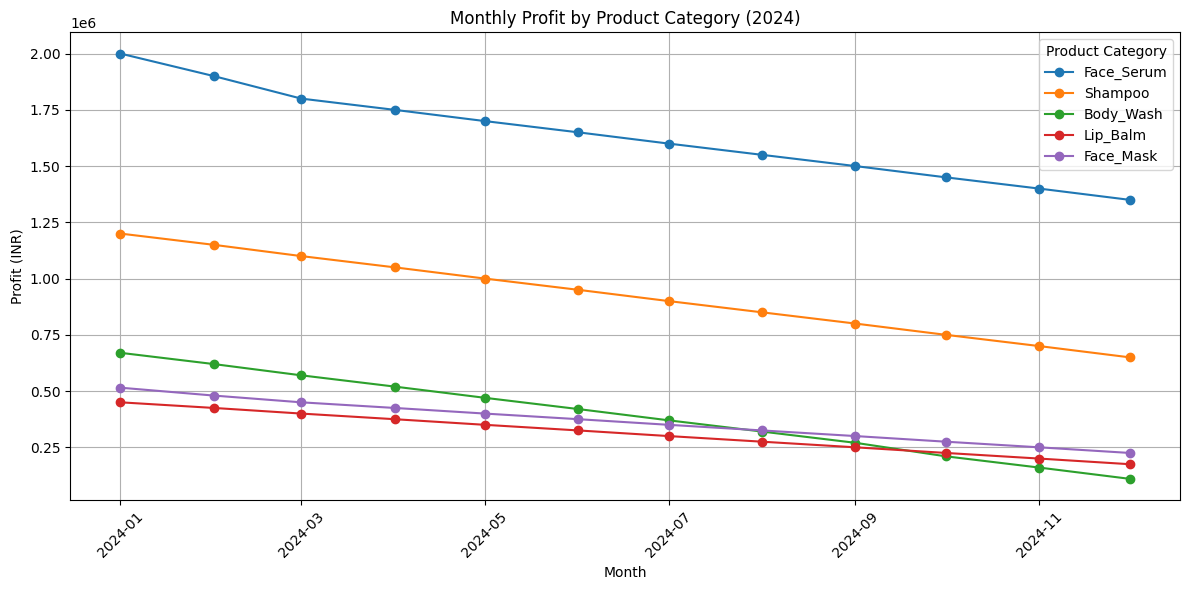

In [100]:
#Line Plot
plt.figure(figsize=(12, 6))
categories = df['Product_Category'].unique()
for category in categories:
    category_data = df[df['Product_Category'] == category]
    monthly_profit = category_data.groupby('Month')['Profit_INR'].sum()
    plt.plot(monthly_profit.index, monthly_profit.values, marker='o', label=category)

plt.title('Monthly Profit by Product Category (2024)')
plt.xlabel('Month')
plt.ylabel('Profit (INR)')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.grid(True)
plt.tight_layout()
plt.show()

- Observations<br><br>
    - Every product category—Face Serum, Shampoo, Body Wash, Face Mask, and Lip Balm—shows a steady and uninterrupted decline in profit from January to December 2024. No category displays a reversal or plateau in its downward trend.
    - Face Serum starts as the most profitable category (over 20 lakh INR) but experiences a significant drop, ending the year around 13.5 lakh INR.
    - Shampoo is the next most profitable, declining from about 12 lakh INR to 6.5 lakh INR.
    - Body Wash and Face Mask both begin near 7 and 5 lakh INR, respectively, and both decline to below 2 lakh INR by year-end.
    - Lip Balm consistently has the lowest profit, dropping from 4.5 lakh INR to just above 1.5 lakh INR.
    - The downward trend is observed in all five categories, indicating that the decline in profit is not limited to a particular product line but is universal.<br><br>
- Interpretation:<br><br>
    - The line plot clearly demonstrates that all product categories are experiencing profit declines throughout 2024. This suggests a systemic issue affecting the entire product portfolio, rather than isolated problems in specific categories.
    - The synchronized decline across categories may be due to broad challenges such as increased costs, declining sales volumes, higher returns, rising discounts, or external market pressures.
    - Since no category is showing resilience or growth, GlowNest should focus on company-wide strategies to address the root causes of the decline. Efforts could include cost optimization, product innovation, improved marketing efficiency, and enhanced customer satisfaction across all categories.<br><br>

#### 7b.  Pie Chart - Total Profit Contribution by Product

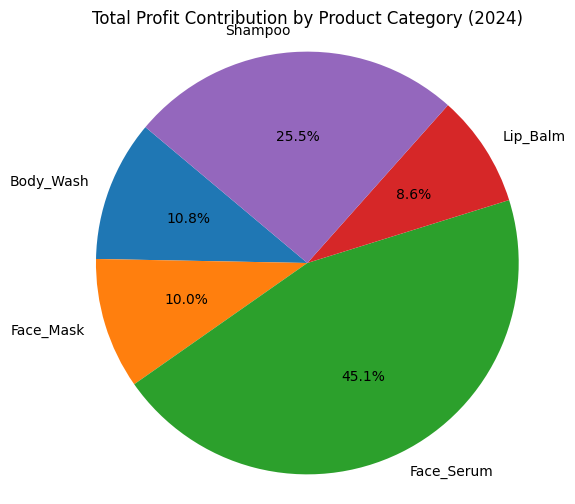

In [101]:
# Group by product and sum profit
product_profit = df.groupby("Product_Category")["Profit_INR"].sum()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(product_profit, labels=product_profit.index, autopct="%1.1f%%", startangle=140)
plt.title("Total Profit Contribution by Product Category (2024)")
plt.axis("equal")
plt.show()

#### 7c. Bar Plot - Total Profit Contribution by Product

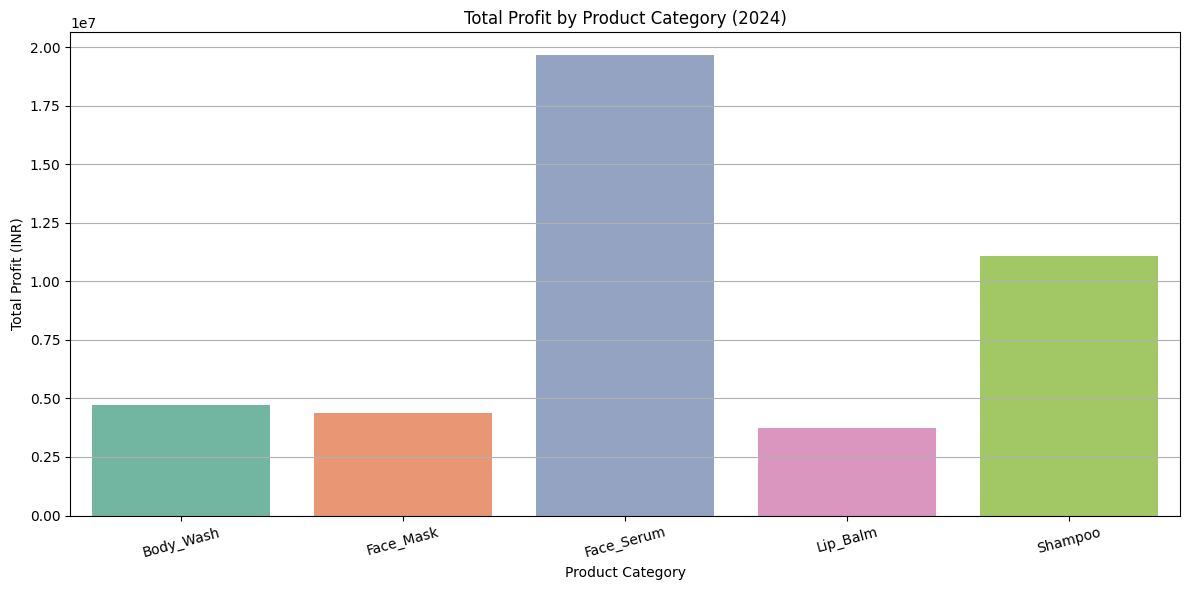

In [102]:
# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=product_profit.index, y=product_profit.values, palette="Set2")
plt.title("Total Profit by Product Category (2024)")
plt.xlabel("Product Category")
plt.ylabel("Total Profit (INR)")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- Observations:<br><br>
    - Both the pie chart and the bar plot show that Face Serum is the dominant profit contributor, making up 45.1% of total profit.
    - Shampoo is the next largest, contributing 25.5%.
    - Body Wash (10.8%) and Face Mask (10.0%) have similar, moderate shares.
    - Lip Balm has the smallest contribution at 8.6%.
    - The bar plot provides a clear visual ranking and magnitude of profit for each category, while the pie chart emphasizes their proportional share of the whole.

- Interpretation:<br><br>
    - Profitability is highly concentrated in Face Serum and Shampoo, which together account for over 70% of total profit.
    - The remaining categories—Body Wash, Face Mask, and Lip Balm—collectively make up less than 30%, indicating they play a much smaller role in overall profitability.
    - This concentration suggests that GlowNest’s financial health is heavily dependent on the continued success of its top two categories, and underperformance in either could significantly impact total profit.
    - The use of both chart types reinforces the insight: while the pie chart highlights the share of each category, the bar chart makes it easy to compare their absolute profit values.

- Summary: <br>
Both the pie chart and bar plot clearly demonstrate that Face Serum and Shampoo are the dominant contributors to total profit, together accounting for more than 70% of overall profitability. The remaining categories—Body Wash, Face Mask, and Lip Balm—make up much smaller portions of the profit pool, with each contributing less than 11%. This concentration of profit in just two product categories highlights a significant business risk: if either Face Serum or Shampoo underperforms due to market shifts, operational issues, or increased competition, overall company profitability could be severely impacted. These visualizations underscore the importance of not only maintaining the strong performance of top categories but also strategically strengthening or diversifying the lower-contributing product lines. By doing so, GlowNest can mitigate risk, reduce dependency, and build a more resilient and balanced profit structure for the future.

#### 7d. Box Plot- Total Profit contribution by Product

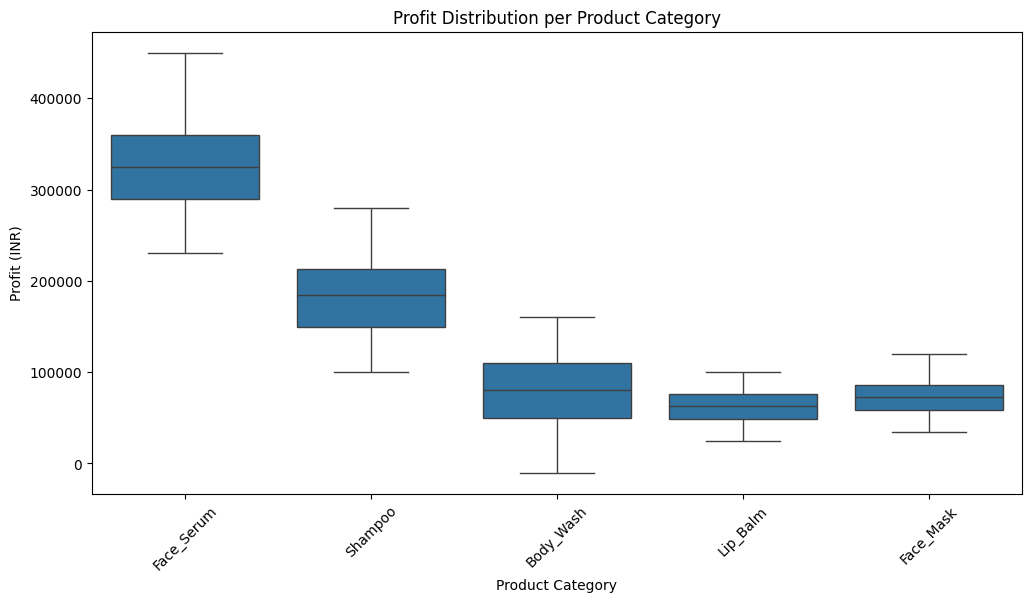

In [103]:
#Box Plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Product_Category', y='Profit_INR')
plt.title('Profit Distribution per Product Category')
plt.xticks(rotation=45)
plt.ylabel('Profit (INR)')
plt.xlabel('Product Category')
plt.show()

- Observation:
    - Face Serum has the highest median profit and the widest interquartile range (IQR), indicating not only strong profitability but also significant month-to-month or region-to-region variability. Its whiskers extend higher than all other categories, showing potential for exceptional profits, but also a broad spread.
    - Shampoo is the next most profitable, with a moderate median and a noticeable spread, suggesting some variability but generally solid performance.
    - Body Wash shows a lower median profit and a wider spread than Face Mask or Lip Balm, indicating more volatility and occasional low-profit periods.
    - Face Mask and Lip Balm both have low median profits and relatively tight IQRs, reflecting consistently modest returns with less variability and fewer extreme values.
    - No category displays extreme outliers, but the spread in Face Serum and Body Wash highlights periods of both high and low profitability within these categories.



### 8. Regional Problems Analysis

#### 8a. Monthly profit trends in 5 regions

In [104]:
#Region-wise total profit
region_profit = df.groupby('Region')['Profit_INR'].sum().sort_values(ascending=False)
region_profit

Region
North        10365000
West          9515000
South         8310000
East          8070000
Northeast     7320000
Name: Profit_INR, dtype: int64

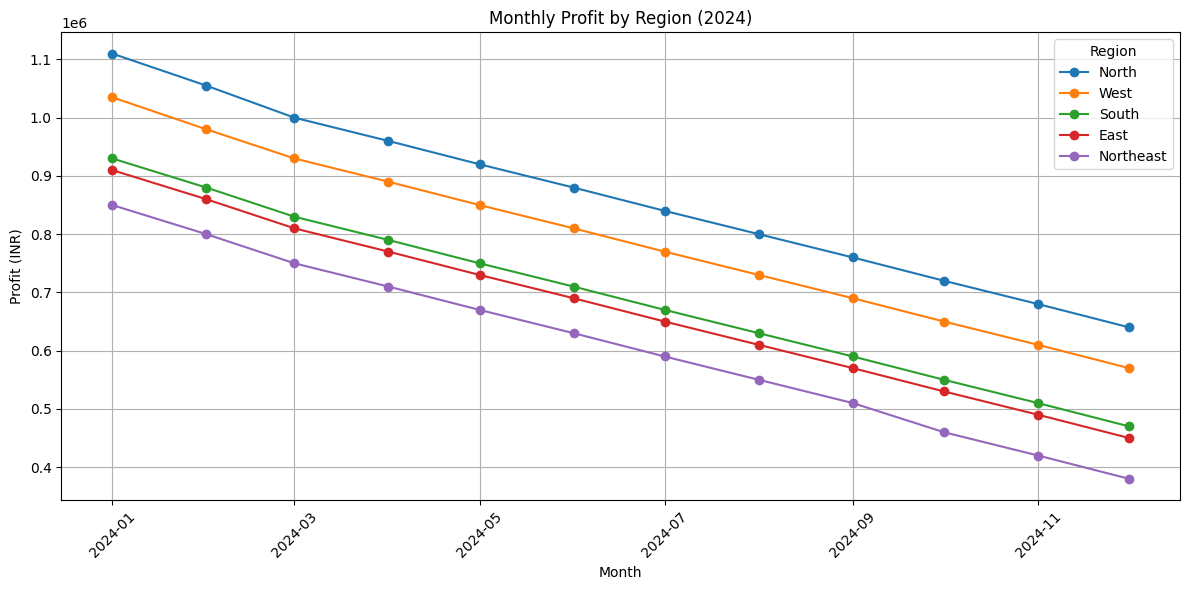

In [105]:
#Line Plot
plt.figure(figsize=(12, 6))
regions = df['Region'].unique()
for region in regions:
    region_data = df[df['Region'] == region]
    monthly_profit = region_data.groupby('Month')['Profit_INR'].sum()
    plt.plot(monthly_profit.index, monthly_profit.values, marker='o', label=region)

plt.title('Monthly Profit by Region (2024)')
plt.xlabel('Month')
plt.ylabel('Profit (INR)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

- Observations:<br><br>
    - Consistent Decline Across All Regions: Every region—North, West, South, East, and Northeast—shows a steady and parallel decline in monthly profit throughout 2024.
    - Regional Ranking: The North region consistently achieves the highest profits each month, followed by West, South, East, and Northeast.
    - Underperforming Regions: The Northeast region has the lowest profit levels in every month, ending the year below 0.4 million INR. East and South also trail behind the North and West, with profits dropping below 0.6 million INR by year-end.
    - Uniform Downward Slope: The rate of decline is similar across all regions, with no region showing stabilization or reversal of the downward trend.
<br><br>
- Interpretation: <br><br>
    - Widespread Regional Challenges: The universal decline across all regions suggests that company-wide or market-wide factors—such as increased costs, declining demand, or operational inefficiencies—are impacting performance everywhere, not just in isolated geographies.
    - Persistent Underperformance in the Northeast: The Northeast stands out as the most underperforming region, consistently generating the lowest profits. This may indicate specific challenges such as weaker market presence, distribution issues, or lower customer demand in that area.
    - Strategic Implications: While all regions require attention due to the overall downward trend, targeted interventions in the Northeast (and potentially East and South) are especially important to address persistent underperformance. At the same time, even higher-performing regions like North and West are not immune to decline and should be included in broader turnaround strategies.<br><br>

#### 8b. Heatmap of Key Performance Indicators per Region

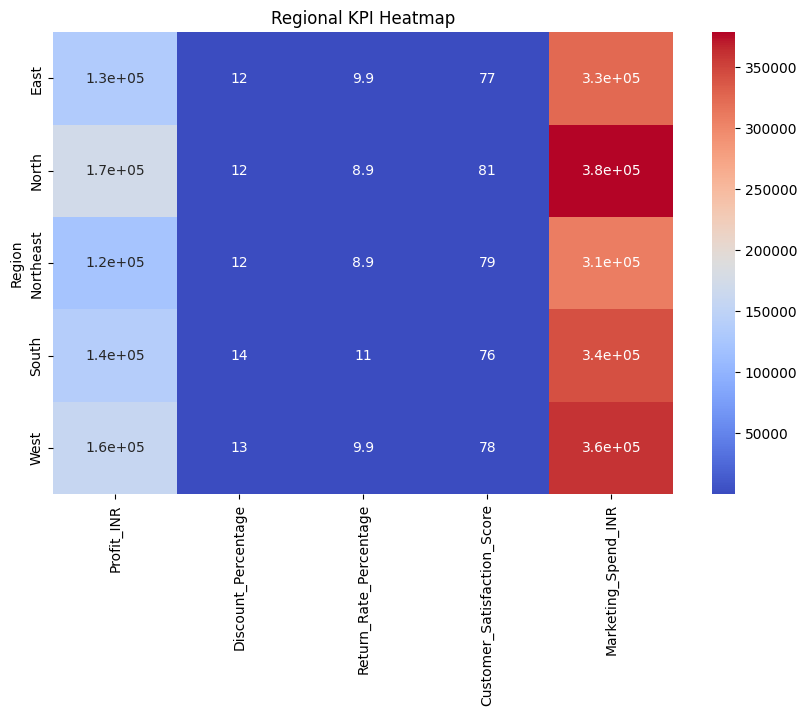

In [106]:
#Heatmap
metrics = df.groupby('Region')[['Profit_INR', 'Discount_Percentage', 'Return_Rate_Percentage', 
                                'Customer_Satisfaction_Score', 'Marketing_Spend_INR']].mean()

plt.figure(figsize=(10,6))
sns.heatmap(metrics, annot=True, cmap='coolwarm')
plt.title('Regional KPI Heatmap')
plt.show()

- Observation<br><br>
    - Profit: The North region leads with the highest average profit (1.7×10⁵ INR), followed by West (1.6×10⁵ INR), South (1.4×10⁵ INR), East (1.3×10⁵ INR), and Northeast (1.2×10⁵ INR).
    - Marketing Spend: North and West have the highest marketing spends (3.8×10⁵ and 3.6×10⁵ INR, respectively), while Northeast spends the least (3.1×10⁵ INR).
    - Discount & Return Rates: Discount percentages are similar across regions (12–14%), but South has the highest return rate (11%), which may be impacting its profit.
    - Customer Satisfaction: North has the highest customer satisfaction score (81), while South is lowest (76), possibly contributing to its lower profit despite higher marketing spend.
<br><br>
- Interpretation<br><br>
    - North and West are top performers in both profit and marketing investment, suggesting their higher spend is more efficiently converted into profit.
    - Northeast and East underperform in profit despite similar discount and return rates, indicating possible market or operational challenges.
    - South’s lower profit may be explained by its higher return rate and lowest customer satisfaction, pointing to product or service quality issues.
    - Strategic focus should be on improving customer satisfaction and reducing return rates in underperforming regions, while analyzing what drives North and West’s relative success for broader application.
<br><br>


#### 8c. Marketing Spend vs Profit by region

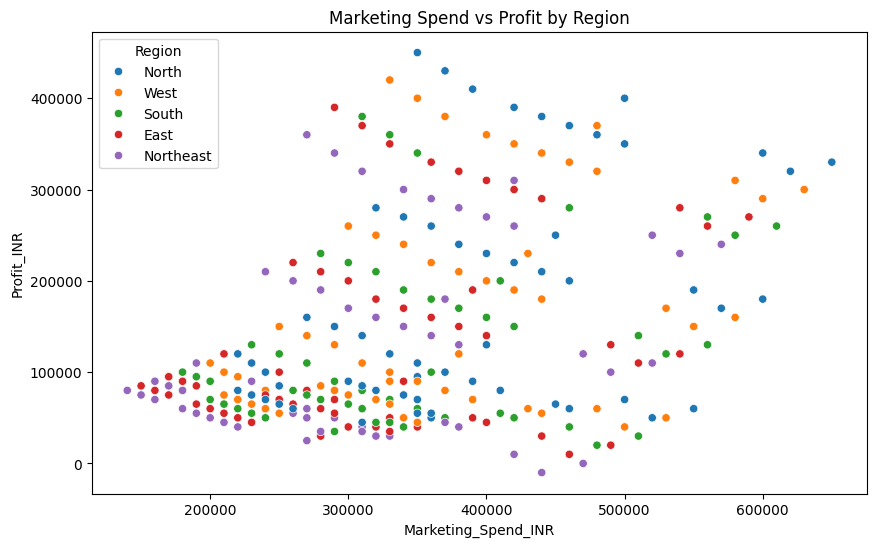

In [107]:
# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Marketing_Spend_INR', y='Profit_INR', hue='Region')
plt.title('Marketing Spend vs Profit by Region')
plt.show()


- Observation<br><br>
    - West and South regions achieve the highest profits for similar marketing spend, with many points above 300,000 INR.
    - North and East have moderate profit levels.
    - Northeast consistently shows the lowest profits, rarely exceeding 150,000 INR, regardless of marketing spend.
    - There is wide scatter overall, indicating that higher marketing spend does not always lead to higher profit.
<br><br>
- Interpretation<br><br>
    - West and South are most efficient at converting marketing spend into profit.
    - Northeast underperforms even with increased spend, suggesting deeper structural issues.
    - Simply increasing marketing budgets is not effective everywhere; region-specific strategies are needed for better returns.
<br><br>

- Summary: <br>Regional analysis reveals that all markets are experiencing declining profits, but the extent and underlying causes vary. North and West consistently lead in profitability and make the most efficient use of marketing spend, while the Northeast persistently underperforms despite investment, indicating deeper market or operational challenges. South’s lower profits are linked to higher return rates and the lowest customer satisfaction, highlighting quality or service issues. These findings suggest that region-specific strategies—focusing on improving customer experience and operational efficiency in underperforming areas, and replicating best practices from top regions—are essential for reversing the downward trend and boosting overall performance.

  <br>

### 9. Industry and Customer Trend Analysis

While the dataset provided does not include direct industry-wide or customer survey data, we can infer key industry and customer trends from the internal metrics observed in GlowNest's 2024 performance. These trends provide crucial context for understanding the profit decline and shaping strategic decisions.

#### 9.1 Trends Inferred from GlowNest’s Internal Data

- **Digital Channel Fatigue**  
  GlowNest's Online Sales Percentage has shown a consistent decline throughout 2024. This may indicate that customers are less engaged with GlowNest’s digital offerings, possibly due to outdated digital interfaces, weak personalization, or superior online experiences offered by competitors.

- **Discount Fatigue and Price Sensitivity**  
  Despite a rise in discounting, profits have continued to fall. This suggests that customers are becoming immune to discounts or that frequent price cuts have devalued the perceived worth of GlowNest products. It may also point to over-reliance on short-term tactics rather than long-term customer loyalty building.

- **Quality-Conscious Customers**  
  Return rates have remained high while customer satisfaction scores have declined. This reflects a trend where customers are increasingly sensitive to product quality and less tolerant of defects or inconsistencies. Poor quality impacts not only direct costs (returns, replacements) but also long-term brand reputation.

- **Product Category Saturation or Decline**  
  All five product categories have experienced declining profits, indicating either industry-wide product fatigue or a lack of innovation from GlowNest. This trend suggests a potential mismatch between the current product offerings and evolving customer needs.

- **Geographic Market Disparity**  
  Certain regions have consistently underperformed, highlighting regional demand shifts or ineffective localized marketing strategies.

#### 9.2 Broader Industry and Consumer Trends

Based on industry reports and trends relevant to GlowNest's sector:

- **Post-Pandemic E-commerce Plateau**  
  Many retail sectors have seen a slowdown in online sales growth after the pandemic-era surge. Customers now expect high-quality digital experiences, not just availability.

- **Rising Marketing Costs and Lower ROI**  
  The cost of digital advertising has increased across the board, making it harder to maintain high marketing ROI. Companies must now rely on precision targeting and customer analytics.

- **Customer Preference Shift to Experience and Quality**  
  Consumers are prioritizing quality, sustainability, and brand values over low prices. Generic heavy discounting is losing effectiveness unless paired with a strong customer experience.

- **Return Culture and Cost Sensitivity**  
  The rise of lenient return policies has created a customer base accustomed to easy returns. This behavior, while expected, imposes high operational and logistical costs.

---

These insights make it clear that GlowNest must evolve in tandem with its customers and the industry. The next section proposes data-driven strategic recommendations based on this analysis.


### 10. Final Insights & Strategy Recommendations

After an in-depth analysis of GlowNest's 2024 financials across product categories, regions, customer behavior, and marketing performance, we have identified several key issues contributing to the company's profit decline. Each of these problems has been quantified using internal metrics and is addressed with specific, data-driven strategies for recovery.

---

#### Key Issues Identified and Strategic Recommendations

| Issue | Evidence from Data | Strategic Recommendation |
|-------|--------------------|---------------------------|
| **1. Poor Marketing ROI** | Marketing ROI < 1 in several months and across multiple product categories, despite increased spend | Reallocate marketing budgets toward high-performing categories and profitable regions. Shift from broad-based campaigns to targeted digital marketing using customer segmentation and personalization. Regularly monitor ROI by channel and product to guide spending decisions. |
| **2. Discount Spiral & Margin Erosion** | Increased discount percentages over the year did not lead to higher profits — in fact, profits continued to decline | Avoid over-reliance on blanket discounting. Instead, implement differentiated promotional strategies based on inventory levels and customer behavior (e.g., bundling, loyalty rewards). Reinforce product value through better quality and brand messaging rather than price alone. |
| **3. Product Quality Crisis** | Return Rate consistently > 15% and Customer Satisfaction Score < 3.5 in several months | Conduct a root cause analysis on high-return SKUs to identify manufacturing or fulfillment issues. Invest in stricter Quality Assurance (QA) and post-purchase support. Launch an initiative to improve packaging, durability, and usability. Consider a “trusted product” badge for high-quality items. |
| **4. Declining Online Sales Performance** | Online Sales % has declined significantly across the year despite industry trend favoring digital | Revamp the online shopping experience with improved UI/UX, personalization, and mobile optimization. Introduce targeted campaigns to re-engage lapsed online customers. Use analytics to better understand drop-offs in the digital funnel (e.g., cart abandonment). |
| **5. Universal Product Profit Decline** | All five product categories have experienced declining profits — including traditionally high-performing ones | Conduct a product portfolio review to identify and retire underperforming SKUs. Allocate R&D resources to refresh or innovate top-line products. Explore adjacent product segments that align with emerging customer trends and needs. |
| **6. Regional Underperformance** | Consistent underperformance in East and North regions with low or negative monthly profits | Temporarily reduce investments in low-yield regions. Focus on regions with higher ROI and build deeper customer insights to re-strategize regionally. Customize marketing messages and product offerings based on regional preferences. |
| **7. Competitor Efficiency Advantage** | Competitor earns higher profits with lower marketing spend, suggesting better cost efficiency | Study competitor positioning, distribution, and digital strategy to identify areas for operational efficiency. Streamline GlowNest's internal cost structure, particularly in marketing and supply chain. Adopt a leaner approach with frequent performance reviews. |

---

#### Cross-Cutting Strategic Recommendations

Beyond individual issues, several cross-functional initiatives could help GlowNest regain profitability:

- **Customer-Centricity Program**: Establish a customer insights team to track evolving needs, preferences, and pain points. Align product and marketing strategies with real-time feedback and satisfaction data.
  
- **Data-Driven Marketing Transformation**: Use advanced analytics (e.g., customer lifetime value, churn prediction) to guide campaign design, retention efforts, and ad spend optimization.

- **Real-Time Performance Dashboard**: Develop an internal dashboard tracking category-wise ROI, customer metrics, return rates, and regional KPIs to enable more agile decision-making.

- **Quality and Trust Reinforcement**: Shift messaging from pricing to value and quality. Use verified reviews, satisfaction scores, and quality guarantees to rebuild brand trust.

- **Digital Experience Overhaul**: Treat the online store not just as a channel, but as a customer experience platform. Benchmark against industry leaders in terms of UI/UX, personalization, and post-purchase engagement.

---

These recommendations, if implemented in an integrated manner, will allow GlowNest to reverse its profit decline, reconnect with evolving customer expectations, and reclaim its competitive edge in the market.


## Conclusion

GlowNest’s declining profitability in 2024 is not the result of a single issue, but rather a combination of interconnected factors across marketing strategy, product quality, discounting practices, and regional performance.

Through this data-driven analysis, we observed that:

- **Increased marketing spend did not lead to proportional profit gains**, especially in underperforming categories and regions.
- **Aggressive discounting strategies eroded margins** without significantly boosting volume or satisfaction.
- **Product quality issues**, evidenced by high return rates and low satisfaction scores, have had a direct negative impact on brand perception and repeat purchases.
- **Online sales, a key channel for modern retail**, have steadily declined, suggesting a mismatch between digital offerings and customer expectations.
- **All product categories are experiencing a downturn**, signaling the need for innovation and portfolio re-evaluation.
- **Regional disparities in performance** indicate the necessity for more localized and targeted business strategies.
- **The competitor's ability to maintain higher profits at lower marketing costs** further highlights GlowNest's inefficiencies in customer acquisition and retention.

Despite these challenges, GlowNest has clear opportunities to recover and thrive. By implementing focused, data-backed strategies — including marketing efficiency improvements, quality assurance programs, digital transformation, and portfolio optimization — the company can regain profitability and realign with industry trends and customer expectations.

This EDA not only diagnoses the problem but also lays the foundation for a more responsive, resilient, and customer-centric GlowNest moving forward.

---------------------------------------------------------------------------------------------------------------------------------